In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [2]:
picture_size = 48

folder_path = "../input/dataset3modified/dataset(3) - modified/images/" 


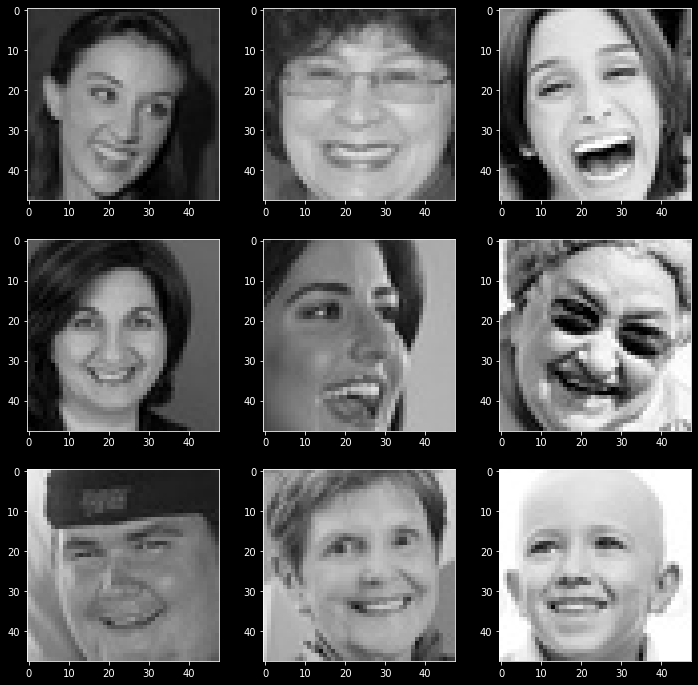

In [3]:
expression = 'happy'
plt.style.use('dark_background')
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
#     img = load_img(folder_path+"train/"+expression+"/"+
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [4]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 58454 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [5]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 3rd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.22))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [6]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 23

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [7]:
history = model.fit(train_set,
                    steps_per_epoch=train_set.n//train_set.batch_size,
                    epochs=epochs,
                    validation_data = test_set,
                    validation_steps = test_set.n//test_set.batch_size,
                    callbacks=callbacks_list
                    )

Epoch 1/23
456/456 [==============================] - 305s 650ms/step - loss: 1.6450 - accuracy: 0.3634 - val_loss: 1.5496 - val_accuracy: 0.4166
Epoch 2/23
456/456 [==============================] - 56s 123ms/step - loss: 1.2477 - accuracy: 0.5221 - val_loss: 1.1202 - val_accuracy: 0.5753
Epoch 3/23
456/456 [==============================] - 54s 119ms/step - loss: 1.1163 - accuracy: 0.5780 - val_loss: 1.1076 - val_accuracy: 0.5736
Epoch 4/23
456/456 [==============================] - 54s 118ms/step - loss: 1.0290 - accuracy: 0.6097 - val_loss: 0.9854 - val_accuracy: 0.6298
Epoch 5/23
456/456 [==============================] - 57s 124ms/step - loss: 0.9588 - accuracy: 0.6402 - val_loss: 0.9602 - val_accuracy: 0.6423
Epoch 6/23
456/456 [==============================] - 54s 118ms/step - loss: 0.8913 - accuracy: 0.6666 - val_loss: 0.9226 - val_accuracy: 0.6540
Epoch 7/23
456/456 [==============================] - 58s 127ms/step - loss: 0.8256 - accuracy: 0.6927 - val_loss: 0.9788 - val_a

In [8]:
model.save("my_model.h5")

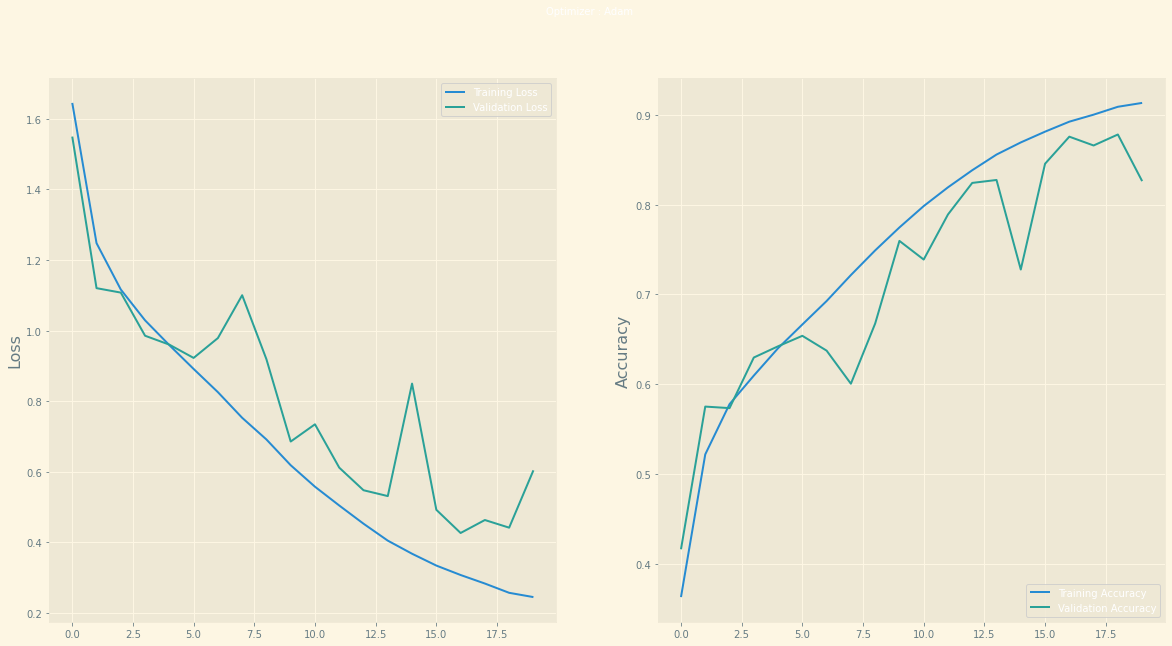

In [9]:
plt.style.use('Solarize_Light2')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
# Save the graph as an image
plt.savefig('cnn_graph.png')
plt.show()


In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have the predicted labels and true labels
# Make predictions on the test set
predicted_labels = model.predict(test_set)
predicted_labels = np.argmax(predicted_labels, axis=1)  # Convert probabilities to class labels

true_labels = test_set.classes

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Calculate the classification report
cr = classification_report(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Print the classification report
print("\nClassification Report:")
print(cr)

Confusion Matrix:
[[ 878    2    8   12   17   33   10]
 [  14   91    0    1    0    1    4]
 [ 115    1  736    8   45   67   46]
 [  24    0    5 1737   28   17   14]
 [  57    1    6   33 1058   57    4]
 [  89    1   21   15   60  945    8]
 [  10    0   17   10   11    5  744]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.91      0.82       960
           1       0.95      0.82      0.88       111
           2       0.93      0.72      0.81      1018
           3       0.96      0.95      0.95      1825
           4       0.87      0.87      0.87      1216
           5       0.84      0.83      0.83      1139
           6       0.90      0.93      0.91       797

    accuracy                           0.88      7066
   macro avg       0.88      0.86      0.87      7066
weighted avg       0.88      0.88      0.88      7066



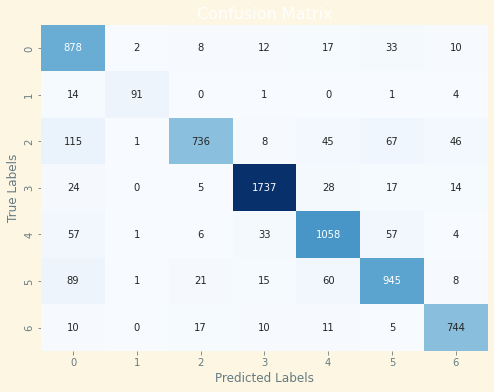

In [11]:
# Plotting the confusion matrix with colors
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()

Confusion Matrix:
[[ 878    2    8   12   17   33   10]
 [  14   91    0    1    0    1    4]
 [ 115    1  736    8   45   67   46]
 [  24    0    5 1737   28   17   14]
 [  57    1    6   33 1058   57    4]
 [  89    1   21   15   60  945    8]
 [  10    0   17   10   11    5  744]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.91      0.82       960
           1       0.95      0.82      0.88       111
           2       0.93      0.72      0.81      1018
           3       0.96      0.95      0.95      1825
           4       0.87      0.87      0.87      1216
           5       0.84      0.83      0.83      1139
           6       0.90      0.93      0.91       797

    accuracy                           0.88      7066
   macro avg       0.88      0.86      0.87      7066
weighted avg       0.88      0.88      0.88      7066



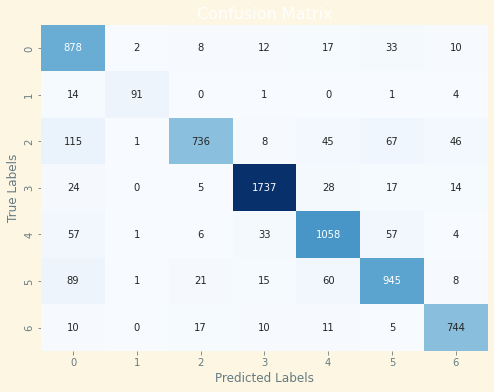

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have the predicted labels and true labels
# Make predictions on the test set
predicted_labels = model.predict(test_set)
predicted_labels = np.argmax(predicted_labels, axis=1)  # Convert probabilities to class labels

true_labels = test_set.classes

# Get the class labels
class_labels = sorted(set(true_labels))

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Calculate the classification report
cr = classification_report(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Print the classification report
print("\nClassification Report:")
print(cr)

# Plotting the confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()